# TSMAI sheet01 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd

import scipy.signal as sg

/Users/samrouppe/opt/anaconda3/envs/3dcv-students/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
class Data:
    """
    treating the data for task 1
    Parameters:
        path (str) : path for loading data
        skiprows (int) : skipping header rows default 1
    """
    
    def __init__(self, path: str, elements: list=None, **kwargs):
        self.path = path
        if path.endswith('.csv'):
            self.elements = elements
            self.raw = np.loadtxt(self.path,**kwargs).T
        elif path.endswith('.xls'):
            df = pd.read_excel('investment.xls')
            self.elements = df.columns.tolist()
            self.raw = df.to_numpy().T

        if len(np.shape(self.raw)) != 2:
            np.expand_dims(self.raw, axis=0)

    def get_raw(self):
        return self.raw
    
    def get_index(self, indx):
        return self.raw[indx]
    
    def std_for_plot(self, indx):
        self.standardized = ( ( self.raw[indx].T - np.mean(self.raw[indx],axis=1) )/np.var(self.raw[indx],axis=1) ).T
        print(f"standardized array of the indexes created, shape : {np.shape(self.standardized)}")
        return self.standardized
    

    def calc_correlations(self, indx: list):
        pairs = list(combinations(indx,2))
        correlations = np.zeros(len(pairs)) # = len(indx)*(len(indx)-1)/2

        for i,pair in enumerate(pairs):
            correlations[i] = Correlation(self.raw[pair[0]],self.raw[pair[1]])

        return pairs, correlations
    
    def detrend_indx(self, indx):
        return sg.detrend(self.raw[indx])
    
    def stationarity_check(self, indx: int, windowsize: int, windowstep: int=1,strong=False,**kwargs):
        pass

    def return_map(self, indx: int, length: int, title: str=None, cmap='viridis',ax=None):
        """
        Plot a return map (x_n vs x_{n+1}) with fading trail effect using only numpy and pyplot.
        
        Parameters:
            x (array): Input time series
            color (str): Color of the trajectory (matplotlib color)
            alpha_start (float): Starting opacity (0-1)
            alpha_end (float): Ending opacity (0-1)
        """
        x = self.standardized[indx-1,:length]

        # Create return map coordinates
        x_n = x[:-1]
        x_n1 = x[1:]
        n_points = len(x_n)
        
        # Create axes if not provided
        if ax is None:
            fig, ax = plt.subplots(figsize=(8, 8))
        else:
            fig = ax.figure
        
        # Create color values (0 to 1 along the trajectory)
        color_values = np.linspace(0, 1, n_points-1)
        
        # Get colormap
        cmap = plt.get_cmap(cmap)
        
        # Plot each segment with color progression
        for i in range(n_points - 1):
            ax.plot(x_n[i:i+2], x_n1[i:i+2], 
                    color=cmap(color_values[i]),
                    linewidth=1.5,
                    solid_capstyle='round')
        
        # Add labels and grid
        ax.set_xlabel('$x_n$')
        ax.set_ylabel('$x_{n+1}$')
        ax.set_title(f'Return Map of {title} over {length} days')
        ax.grid(True)
        
        # Add colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=n_points))
        sm.set_array([])
        fig.colorbar(sm, ax=ax, label='Position along trajectory')
        
        return ax



In [3]:
def Correlation(x,y,lag=1):
    x_trunc, y_trunc = x[:-lag], y[lag:]
    mean_x, mean_y = np.mean(x_trunc), np.mean(y_trunc)
    std_x, std_y = np.std(x_trunc), np.std(y_trunc)

    xt = x_trunc - mean_x
    ytdt = y_trunc - mean_y

    xcov_y = np.mean(xt * ytdt)

    xcorr_y = xcov_y / ( std_x * std_y)

    return xcorr_y

standardized array of the indexes created, shape : (3, 1827)


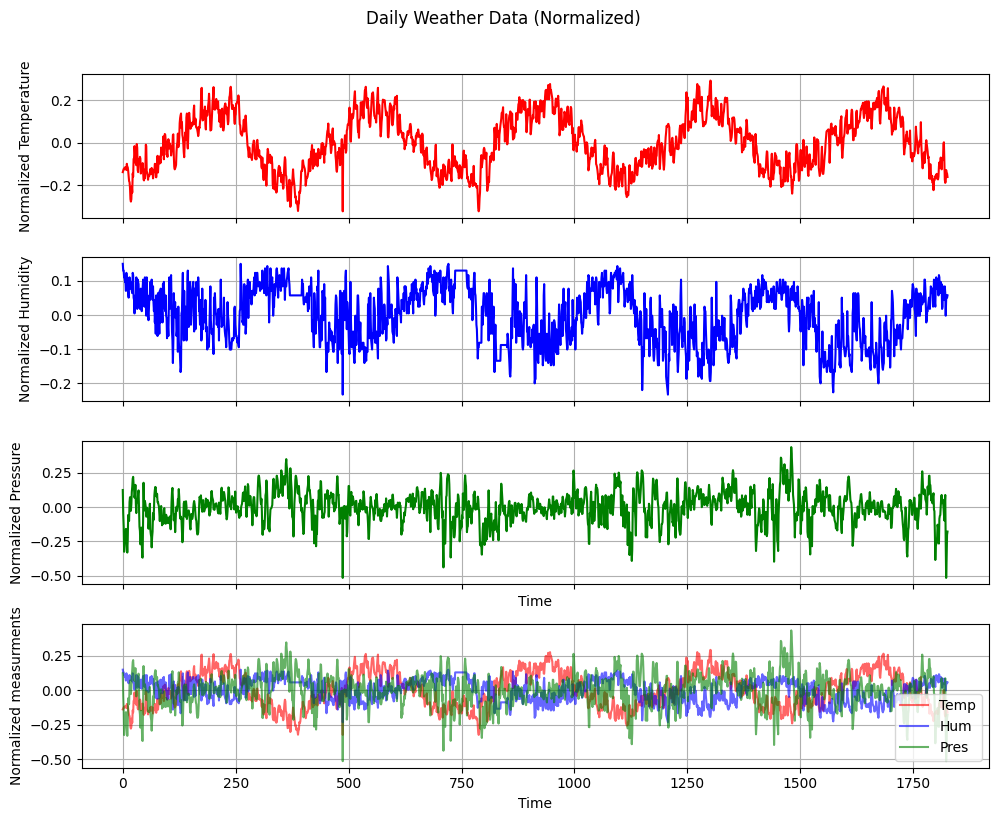

In [4]:
# row 1 in file : Time,Temperature,Humidity,Pressure
dailyweather = Data("dailyweather.csv",elements=["Year","Temerature","Humidity","Pressure"],skiprows=1,delimiter=",")
#print(np.shape(dailyweather_raw))

T_plot,H_plot,P_plot = dailyweather.std_for_plot([1,2,3])

# Create figure with 3 vertical subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Plot Temperature
ax1.plot(T_plot, color='red')
ax1.set_ylabel('Normalized Temperature')
ax1.grid(True)

# Plot Humidity
ax2.plot(H_plot, color='blue')
ax2.set_ylabel('Normalized Humidity')
ax2.grid(True)

# Plot Pressure
ax3.plot(P_plot, color='green')
ax3.set_ylabel('Normalized Pressure')
ax3.set_xlabel('Time')
ax3.grid(True)

# Plot Pressure
ax4.plot(T_plot, alpha=0.6, color='red', label="Temp")
ax4.plot(H_plot, alpha=0.6, color='blue', label="Hum")
ax4.plot(P_plot, alpha=0.6, color='green', label="Pres")
ax4.set_ylabel('Normalized measurments')
ax4.set_xlabel('Time')
ax4.legend()
ax4.grid(True)

# Main title
plt.suptitle('Daily Weather Data (Normalized)', y=1.02, fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Visually there sems to be some correlation in between the humidity and temperature. They seem to have similar periodicity, but in oposite phase, althoug the Humidity visually has higher variance, ecpesially when temperature is high. The pressure does not look very correlated visually.

In [5]:
pairs, correlations = dailyweather.calc_correlations([1,2,3])

for i,pair in enumerate(pairs):
    print(f"Correlation betweem {dailyweather.elements[pair[0]]} and {dailyweather.elements[pair[1]]} = {correlations[i]}")


Correlation betweem Temerature and Humidity = -0.5482806470222328
Correlation betweem Temerature and Pressure = -0.02336909844159686
Correlation betweem Humidity and Pressure = 0.000829331040370216


The calculated correlation between Temp and Humidity confirms there is some correlation between them, the others seem to have little to no correlation.

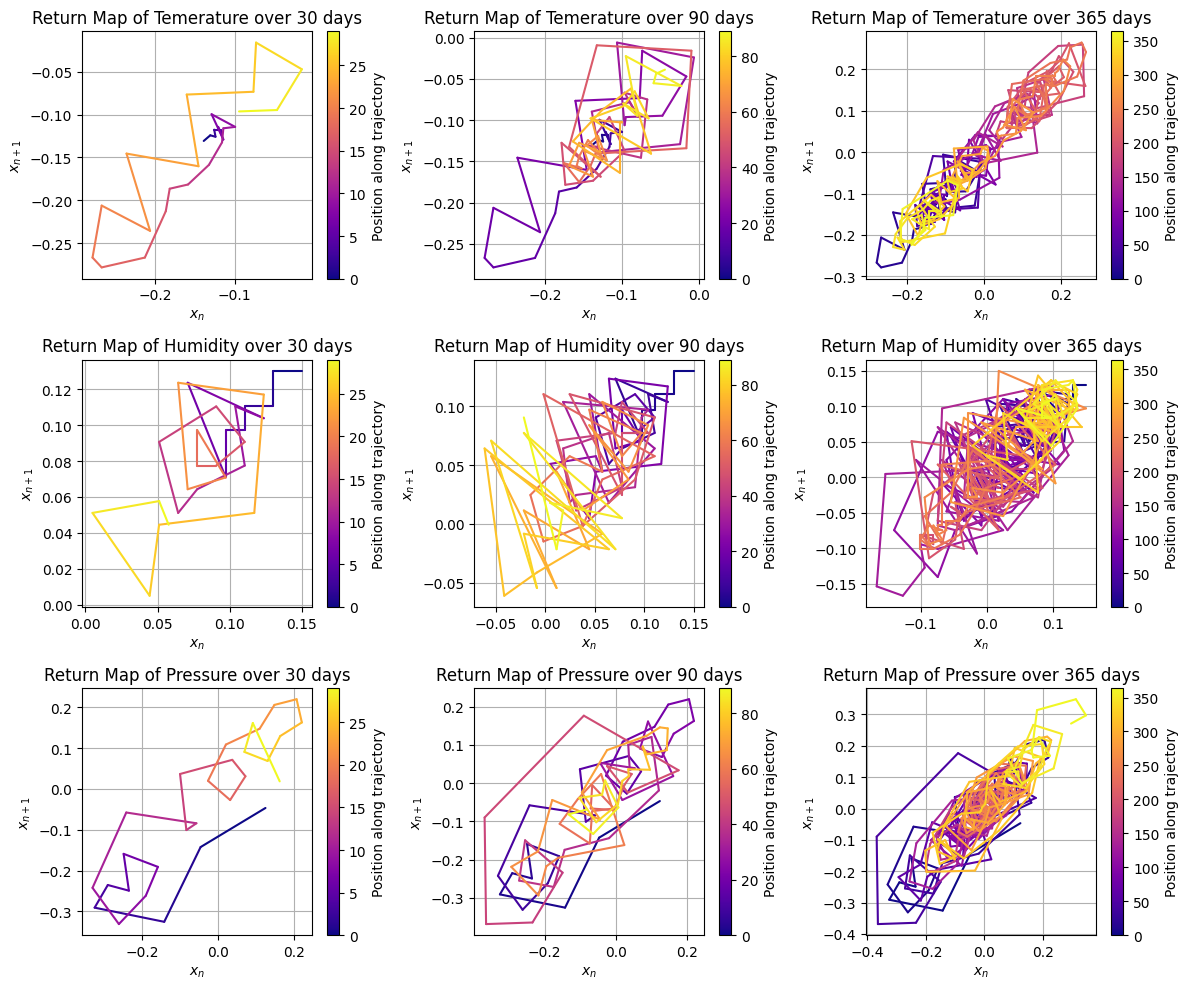

In [6]:
days = [30,90,365]

fig = plt.figure(figsize=(12, 10))
plt_indx = 1

for i in range(1,4):
    for j in range(1,len(days)+1):
        ax = fig.add_subplot(len(days),len(days),plt_indx)
        dailyweather.return_map(i,days[j-1],title=dailyweather.elements[i],cmap="plasma",ax=ax)
        plt_indx += 1

plt.tight_layout()
plt.show()

Looking at the temperature plot it is hard to see if there is any upward trend of the average. Too see this one could compare averages over the years spearatly, or one could do a linear regression fit and see if the linear fit has a positive non zero growth rate.

## Task 2

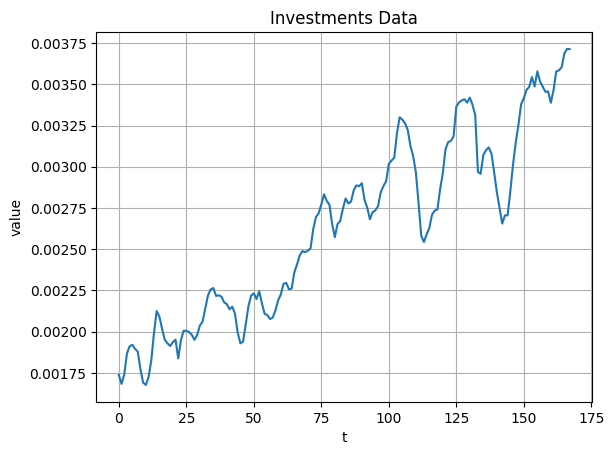

In [ ]:
investments = Data('investment.xls')

TS = investments.get_index(0)

plt.plot(TS)
plt.grid(True)
plt.xlabel("t")
plt.ylabel("value")
plt.title("Investments Data")
plt.show()

Since we see there is a constant offset in the data we need to fit a line $\text{investment}(t_\textit{n}) = mt_\textit{n} + b$ otherwise, the data will not be properly centered around zero after detrending.

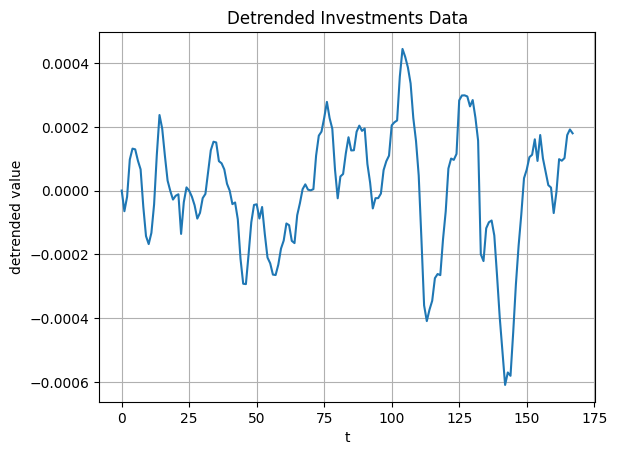

In [12]:
detrended_TS = investments.detrend_indx(0)

plt.plot(detrended_TS)
plt.xlabel("t")
plt.ylabel("detrended value")
plt.title("Detrended Investments Data")
plt.grid(True)
plt.show()

### Stationarity 

#### Weak Stationarity

Weak stationarity fullfills:

- $\mathbb{E}[X] = \mu_t = \text{const}, \ \forall t$
- $\text{Acov}(X_t, X_{t+h}) = \text{Acov}(\Delta t, \ \forall t,\Delta t)$

In words the two first moments, and the auto correlation should be constant in time. 

#### Strong Stationarity

Strong stationarity fullfills:

- $\text{P}(\{X_t|t_0 \leq t \leq t_1\}) = \text{P}(\{X_t|t_0 + \Delta t \leq t \leq t_1 + \Delta t \}), \ \forall t_0, t, \Delta t \geq 0$

In words the entire probability distribution should be constant in time.